KeywordGraph: https://github.com/rangeonnicolas/keywordGraph/blob/master/keyWordGraph.py

CDlib - Community Discovery Library: https://cdlib.readthedocs.io/en/latest/index.html

TextRank-Keyword-Extraction: https://github.com/JRC1995/TextRank-Keyword-Extraction

In [1]:
!python -m spacy download en_core_web_lg
!pip install sentence-transformers
!pip install gensim
!pip install networks
!pip install matplotlib
!pip install yake
!pip install editdistance==0.3.1
!pip install nltk

!pip install textgraphics
!pip install networkx
!pip install python-louvain
!pip install cdlib
!pip install communities

2021-03-25 13:45:33.101360: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-25 13:45:33.101397: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |█████████████████████████████   | 707.3 MB 114.3 MB/s eta 0:00:01IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

     |████████████████████████████████| 778.8 MB 10 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load

In [2]:
import sys
sys.path.insert(1, '/work/IFT6010_Story_Tree/src/features/')

#from keyword_extractor import f_measure
#from keyword_extractor import keyword_extractor

from keyWordGraph import KeywordGraph
from get_tf_idf import get_corpus_tf_idf
import pandas as pd
from cdlib import algorithms
import networkx as nx
# import communities

#news_dataset["extracted_keywords"] = news_dataset["TEXT"].apply(keyword_extractor)
#news_dataset.to_pickle("/work/News_dataset/pd_news_dataset_2.pickle")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Import Data

In [ ]:
# import numpy as np
# import re
# import nltk
# import itertools
# import yake
# import gensim

# from sklearn.feature_extraction.text import CountVectorizer
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# from nltk.corpus import stopwords
# from gensim.summarization import keywords as keywords_gensim
# import editdistance as Levenshtein
# import spacy

# #nlp = spacy.load("en_core_web_lg")
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# def keyword_extraction_baseline(text, number_keyword=40, language = "en", max_ngram_size = 1, deduplication_thresold = 0.9, deduplication_algo = 'seqm', windowSize = 1):
#     kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=number_keyword, features=None)
#     keywords = kw_extractor.extract_keywords(text)
#     keywords_extractor = [i[0] for i in keywords] 

#     return keywords_extractor

In [3]:
news_dataset = pd.read_pickle("/work/IFT6010_Story_Tree/data/short_news_dataset_2_with_extractedkeyword.pickle")

## Get TD-IDF 

In [4]:

#arg 1 = dataframe source
#arg 2 = colomne d'ou le texte provient (je l'ai mis en argument parce que je ne connais pas la structure des autres dataframe)
##arg 3 = ngram a considerer... possible solution pour les keywords a n mots (n>1)

dataset_tf_idf, dict_weights = get_corpus_tf_idf(news_dataset,'TEXT',ngram=1)

# Create Graph with keyWordGraph

In [7]:
take_tfidf = False

In [34]:
my_file = open("long_stopwords.txt", "r")
long_list_of_stopwords = my_file.read().split("\n")

In [49]:
keyword_list = list(news_dataset["extracted_keywords"])
keyword_dict = {}
print(keyword_list)
count=0 
count_else=0
for doc_idx, doc in enumerate(keyword_list):
    doc_dict= {}
    for word_idx, word in enumerate(doc):
        # doc_dict[word_idx] = {'word':word}
      
        # take tfidf weights
        if take_tfidf:
            if word not in dict_weights:
                count+=1
                # doc_dict[word_idx] = {'word':word, 'weight': 1/len(doc)}
            elif round(dict_weights[word], 5) > 0:
                count_else+=1
                doc_dict[word_idx] = {'word':word, 'weight': round(dict_weights[word], 4)*1000}
                
        # don't take tfidf 
        else:
            if word not in long_list_of_stopwords:
                doc_dict[word_idx] = {'word':word, 'weight': 1}
            else:
                print(word)
            

        # doc_dict[word_idx] = {'word':word, 'weight': 1/len(doc)}
    keyword_dict[doc_idx] = doc_dict
print(keyword_dict)

[['messenger', 'facebook', 'chat', 'find', 'unfolds', 'happening', 'world'], ['monday', 'trailer', 'night', 'rey', 'jedi', 'espn', 'football', 'bears', 'new', 'disney', 'skywalker', 'stars', 'like', 'ren', 'youtube', 'lucasfilm', 'halftime', 'minnesota vikings', 'adam', 'fisher'], ['details', 'perfumer', "harris'", 'objects', 'feature', 'series', 'captures', 'creation', 'london', 'partner', 'christophe', 'seasonal', 'bespoke', 'miller', 'craft', 'lyn', 'business', 'doubles', 'shopfront', 'customization', 'tailor', 'perfumes', 'marylebone', 'paris', 'grasse, harris'], ['cnn', 'accra', 'saturday', 'ghana', 'people', 'officials', 'incidents', 'tanker', 'exploded', 'said', 'massive', 'streets', 'showed charred', 'gas station', 'killed', 'injured', 'october', 'president', 'killing', 'explosion', '@nakufoaddo'], ['spain', 'catalan', 'independence', 'puigdemont', 'barcelona', 'minister', 'spanish', 'government', 'independently', 'police', 'referendum', 'mayor', 'october', 'monday', 'president

In [39]:
keep_in_memory= True
keyword_graph = KeywordGraph(keyword_dict)

In [44]:
keywords = keyword_graph.get_keywords()
keywords_bipartite = keyword_graph.get_bipartite(keep_in_memory= keep_in_memory)
keyword_node = keyword_graph.get_nodes(keep_in_memory= keep_in_memory)
keyword_edges = keyword_graph.get_edges(min_nb_of_texts_for_each_word=5, keep_in_memory= keep_in_memory)
max_edge_weight_by_word = keyword_graph.get_max_edge_weight_by_word(keep_in_memory= keep_in_memory)
keyword_clusters = keyword_graph.compute_clusters(keep_in_memory= keep_in_memory)

In [45]:
#print(keywords)
#print(keywords_bipartite)
#print(keyword_node)
print(keyword_edges[1])
#print(max_edge_weight_by_word)
#print(keyword_clusters)
keyword_nxGraph = keyword_graph.nxGraph
print(keyword_nxGraph)
print(keyword_nxGraph.nodes(data=True))
# keyword_clusters[keyword_clusters["cluster"] == "cl_5"]

('chat', 'messenger', 22)

[('facebook', {}), ('messenger', {}), ('chat', {}), ('find', {}), ('unfolds', {}), ('happening', {}), ('night', {}), ('monday', {}), ('espn', {}), ('london', {}), ('series', {}), ('paris', {}), ('saturday', {}), ('cnn', {}), ('ghana', {}), ('people', {}), ('killed', {}), ('october', {}), ('president', {}), ('killing', {}), ('independence', {}), ('spain', {}), ('barcelona', {}), ('minister', {}), ('government', {}), ('police', {}), ('referendum', {}), ('cnnmoney', {}), ('tuesday', {}), ('madrid', {}), ('france', {}), ('the european union', {}), ('donald', {}), ('trump', {}), ('secretary', {}), ('summer', {}), ('cabinet', {}), ('the white house', {}), ('sanders', {}), ('health', {}), ('power', {}), ('daughter', {}), ('nurse', {}), ('sister', {}), ('diabetes', {}), ('massachusetts', {}), ('north carolina', {}), ('epa', {}), ('obama', {}), ('cnn health on facebook and twitter', {}), ('news', {}), ('political', {}), ('florida', {}), ('june', {}), ('presidential', 

In [ ]:
# docs_with_keyword_clusters = keyword_graph.get_docs_with_keyword_clusters()
# print(docs_with_keyword_clusters)

# Extract sub-graph

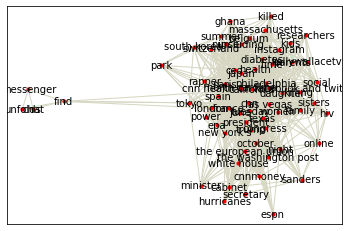

In [46]:
from communities.algorithms import louvain_method
from communities.visualization import draw_communities
import matplotlib.pyplot as plt 
import random

keyword_nxGraph = keyword_graph.nxGraph
#random_index = [random.randrange(0, len(keyword_nxGraph)) for i in range(50)]

random_index = [random.randrange(0, 100) for i in range(100)]

selected_nodes = [n[0] for i,n in enumerate(keyword_nxGraph.nodes(data=True)) if i in random_index]  

keyword_nxGraph_subgraph = keyword_nxGraph.subgraph(selected_nodes)

nx.draw_networkx(keyword_nxGraph_subgraph, node_size=10,font_size=10, node_color="#f70000", edge_color="#d6d6c2") 

#plt.show() 
# selected_nodes = [n for i,n,v in enumerate(keyword_nxGraph.nodes(data=True)) if i in random_index]

# Visualize graph

Visualization to test:

https://github.com/shobrook/communities

https://cambridge-intelligence.com/python-graph-visualization-using-jupyter-regraph/

https://github.com/BrambleXu/news-graph

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

Not in python:

https://gephi.org/

draw(): draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

draw_networkx(): draw the graph with Matplotlib with options for node positions, labeling, titles, and many other drawing features. See draw() for simple drawing without labels or axes.

#https://stackoverflow.com/questions/45350222/select-nodes-and-edges-form-networkx-graph-with-attributes

# CDlib - Community Discovery Library

Community detection example with Cdlib: https://colab.research.google.com/github/GiulioRossetti/cdlib/blob/master/docs/CDlib.ipynb

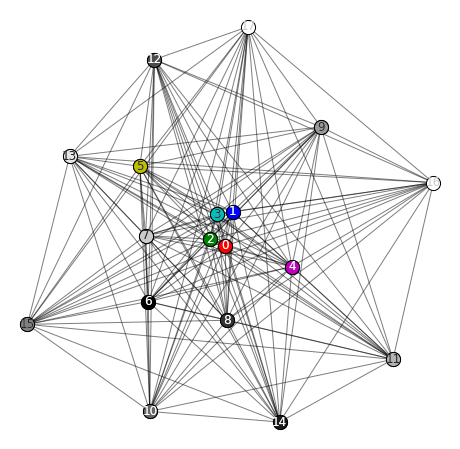

In [14]:
from cdlib import algorithms, viz
keyword_communities = algorithms.louvain(keyword_nxGraph, weight='weight', resolution=1., randomize=False)
viz.plot_community_graph(keyword_nxGraph, keyword_communities, plot_labels= True)

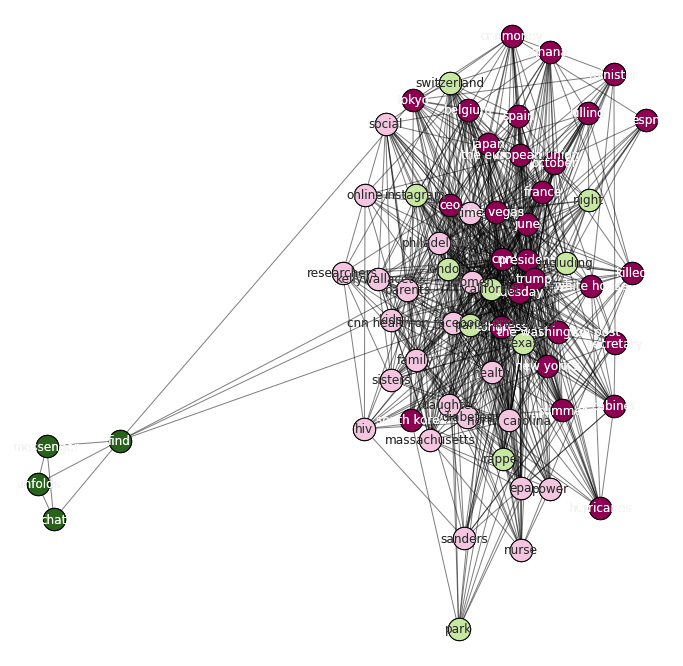

In [47]:
keyword_communities = algorithms.louvain(keyword_nxGraph_subgraph, weight='weight', resolution=1., randomize=False)
keyword_pos = nx.spring_layout(keyword_nxGraph_subgraph)
viz.plot_network_clusters(keyword_nxGraph_subgraph, keyword_communities, keyword_pos, figsize=(12, 12), node_size=500, cmap="PiYG", plot_labels= True)

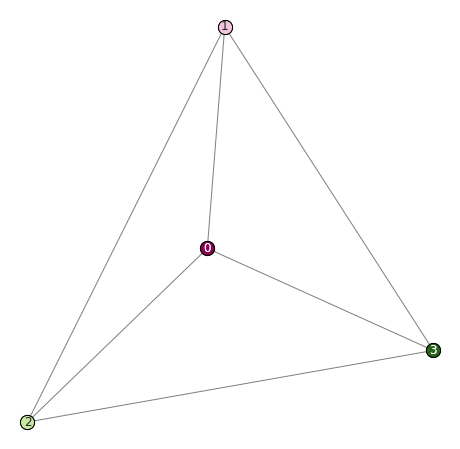

In [16]:
viz.plot_community_graph(keyword_nxGraph_subgraph, keyword_communities, cmap="PiYG", plot_labels= True)

In [ ]:
# viz.plot_sim_matrix(clusterings, scoring)	#Plot a similarity matrix between a list of clusterings, using the provided scoring function.
# viz.plot_com_stat(com_clusters, com_fitness)	#Plot the distribution of a property among all communities for a clustering, or a list of clusterings (violin-plots)
# viz.plot_com_properties_relation(com_clusters, …)	#Plot the relation between two properties/fitness function of a clustering
# viz.plot_scoring(graphs, ref_partitions, …[, …])

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


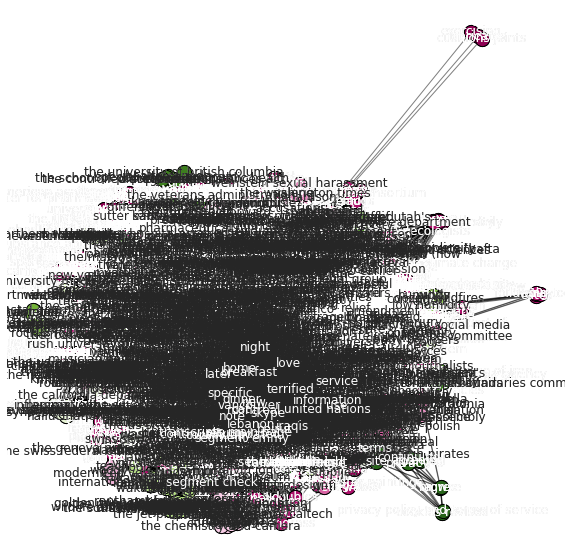

In [17]:
keyword_communities = algorithms.louvain(keyword_nxGraph, weight='weight', resolution=1., randomize=False)
keyword_pos = nx.spring_layout(keyword_nxGraph)
viz.plot_network_clusters(keyword_nxGraph, keyword_communities, keyword_pos, figsize=(10, 10), cmap="PiYG", plot_labels= True)

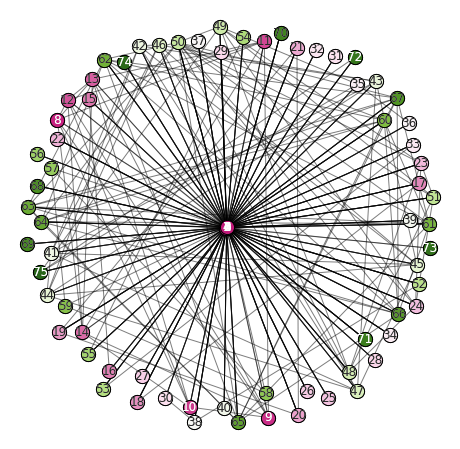

In [ ]:
viz.plot_community_graph(keyword_nxGraph, keyword_communities, cmap="PiYG", plot_labels= True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=902703f2-430f-48f3-ba3f-6c2fee66cf11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>